In [268]:
from pysb import *
from pysb.integrate import Solver
from pysb.simulator import ScipyOdeSimulator 
from pysb.simulator.base import Simulator, SimulationResult

import scipy
import scipy.integrate
import pylab as pl
import numpy as np
import sympy

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Gliaden Degrader 
### pySB black-box Enzyme Kinetics Model @ pH = 4

### Model Declaration

In [284]:
g_killa=Model()


#Monomers

Monomer('gliadin', ['b', 'immunogenic'], {'immunogenic': ['yes','no']})
#Monomer('cleavedGluten', ['immunogenic'])
Monomer('kumamax', ['b'])


#Parameters

Parameter('k_f', 20)
#('k_r', 1e-05)
Parameter('k_cat', 30.448)
#Parameter('k_tot', 0.00141718) #estimated from half-life equation
#Parameter('k_obs', 0.00328545) #@PQ

Parameter('init_G_conc', 0.001) #initial gliadin concentration = mol/L
Parameter('init_Kuma_Conc', 0.0001) # 1:10 mol ratio [E]:[S]



#Rules

Rule('enzyme_binds_gliadin', gliadin(b=None, immunogenic='yes') + kumamax(b=None) >> gliadin(b=1, immunogenic='yes') % kumamax(b=1), k_f)

Rule('enzyme_cleaves_gliadin', gliadin(b=1, immunogenic='yes') % kumamax(b=1) >> gliadin(b=None, immunogenic='no') + kumamax(b=None), k_cat) 


#Observables

Observable('obsImmunogenicGliadin', gliadin(b=None, immunogenic='yes'))
Observable('obsDegradedGliadin', gliadin(b=None, immunogenic='no'))
Observable('obsFreeKumamax', kumamax(b=None))
Observable('obsBoundKumamax', kumamax(b=1))


#Boundary Conditions

Initial(gliadin(b=None, immunogenic='yes'), init_G_conc) #mol/L
Initial(kumamax(b=None), init_Kuma_Conc) #mol/L


Solver & Plotting

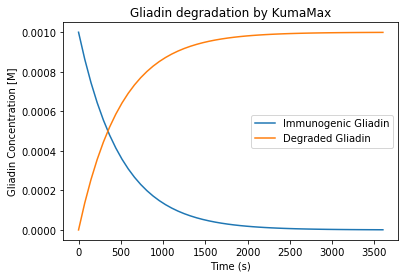

In [288]:
t = pl.linspace(0, 3600)
scipysim = ScipyOdeSimulator(g_killa).run(tspan=t)
yout = scipysim.all

pl.ion()
pl.figure()
pl.plot(t, yout['obsImmunogenicGliadin'], label="Immunogenic Gliadin")
pl.plot(t, yout['obsDegradedGliadin'], label="Degraded Gliadin")
pl.legend(loc=0)
pl.xlabel("Time (s)")
pl.ylabel("Gliadin Concentration [M]")
pl.title("Gliadin degradation by KumaMax")
pl.show()

### Model Assumptions:
- k_f & k_cat assumed, estimated based on available data
- binding rxn assumed forward only, ignores reverse rxn ('<>' command not working)
- KumaMax concentration assumed constant
- 1 active site on KumaMax



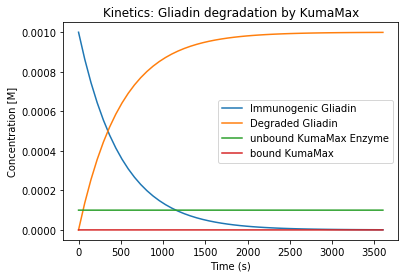

In [289]:
pl.ion()
pl.figure()
pl.plot(t, yout['obsImmunogenicGliadin'], label="Immunogenic Gliadin")
pl.plot(t, yout['obsDegradedGliadin'], label="Degraded Gliadin")
pl.plot(t, yout['obsFreeKumamax'], label="unbound KumaMax Enzyme")
pl.plot(t, yout['obsBoundKumamax'], label="bound KumaMax")
pl.legend(loc=0)
pl.xlabel("Time (s)")
pl.ylabel("Concentration [M]")
pl.title("Kinetics: Gliadin degradation by KumaMax")
pl.show()